In [1]:
# categorical data, yes or no, only 2 ops

# logicistic regression

### Titanic dataset

In [2]:
# numerical values then use , small datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"C:\Users\KIIT\Downloads\titanic dataset.csv")

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data1=data.describe(include='all')
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [9]:
for value in ['Age']:
    data[value].fillna(data1[value][4],inplace=True)

In [10]:
for value in ['Cabin','Embarked']:
    data[value].fillna(data1[value][2],inplace=True)

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
for i in data.columns:
    print(i,':',data[i].unique())

PassengerId : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 

In [13]:
data2=data.drop(['PassengerId','Ticket','Name','Cabin'],axis=1)

In [14]:
data2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


<Axes: xlabel='Pclass', ylabel='count'>

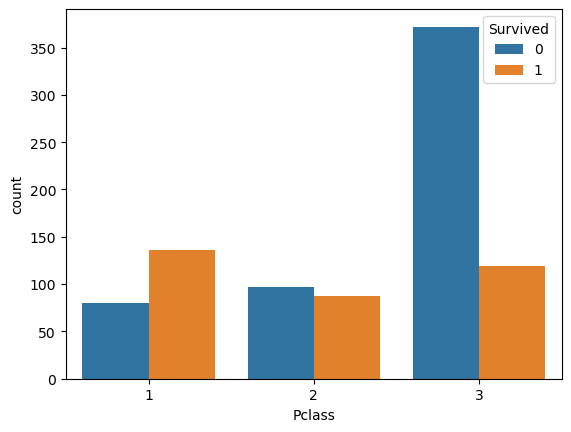

In [15]:
sns.countplot(x=data2.Pclass,hue=data.Survived)

<Axes: xlabel='Sex', ylabel='count'>

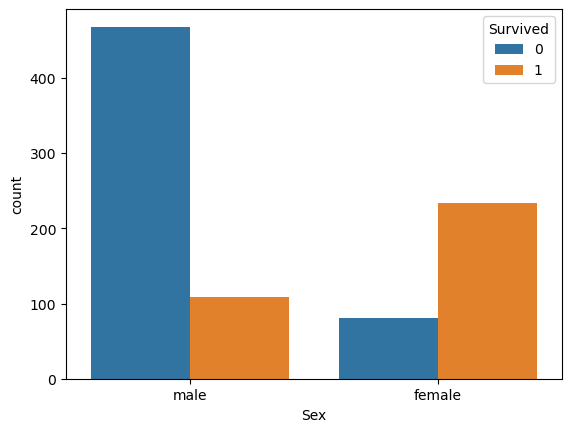

In [16]:
sns.countplot(x=data2.Sex,hue=data.Survived)


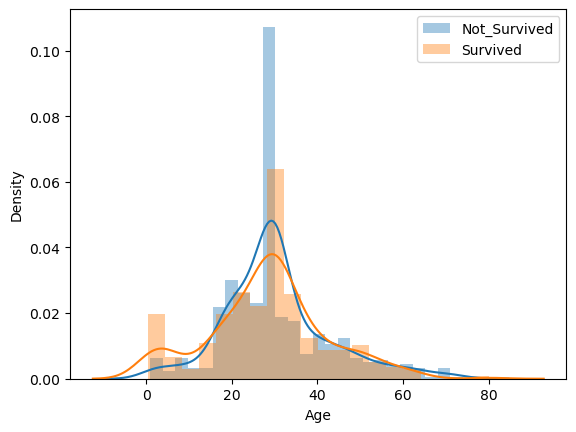

In [17]:
sns.distplot(data2.Age[data2.Survived==0],label='Not_Survived')
sns.distplot(data2.Age[data2.Survived==1],label='Survived')

plt.legend()
plt.show()


<Axes: xlabel='SibSp', ylabel='count'>

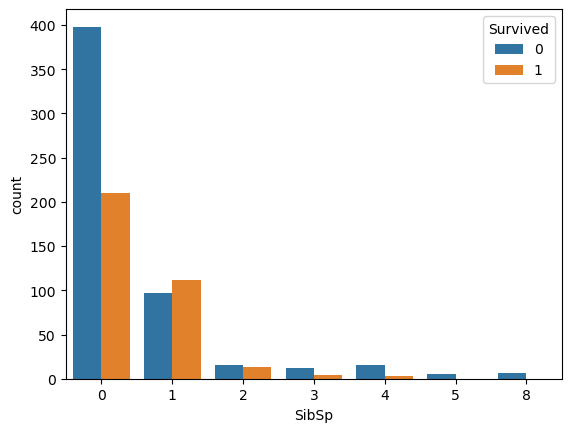

In [18]:
sns.countplot(x=data2.SibSp,hue=data.Survived)

<Axes: xlabel='Parch', ylabel='count'>

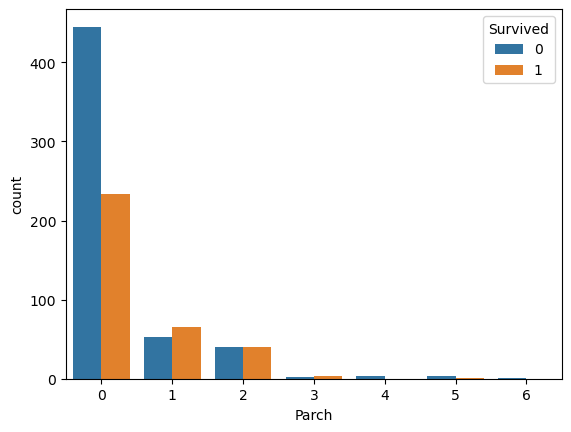

In [19]:

sns.countplot(x=data2.Parch,hue=data.Survived)


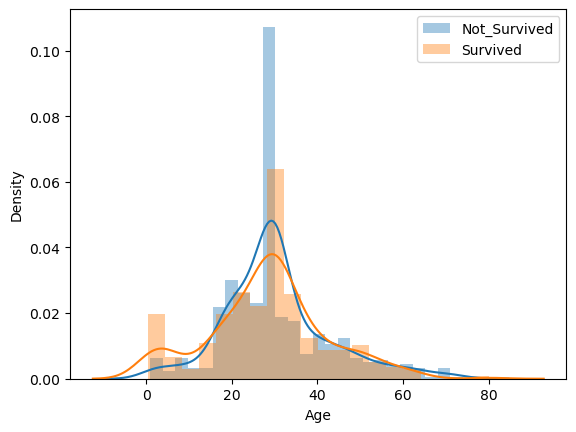

In [20]:
sns.distplot(data2.Age[data2.Survived==0],label='Not_Survived')
sns.distplot(data2.Age[data2.Survived==1],label='Survived')

plt.legend()
plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

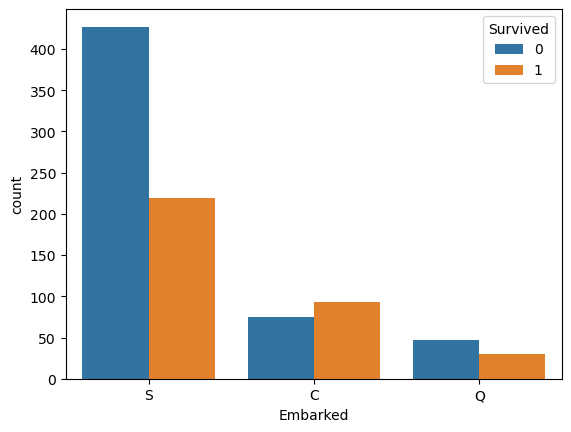

In [21]:
sns.countplot(x=data2.Embarked,hue=data.Survived)


In [22]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
data2.Sex=le1.fit_transform(data2.Sex)

In [23]:
data2.Sex.unique()

array([1, 0])

In [24]:
le1.inverse_transform([1,0])

array(['male', 'female'], dtype=object)

In [25]:
le2=LabelEncoder()
data2.Embarked=le2.fit_transform(data2.Embarked)

In [26]:
data2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [27]:
data2.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [28]:
d=data2.corr()

<Axes: >

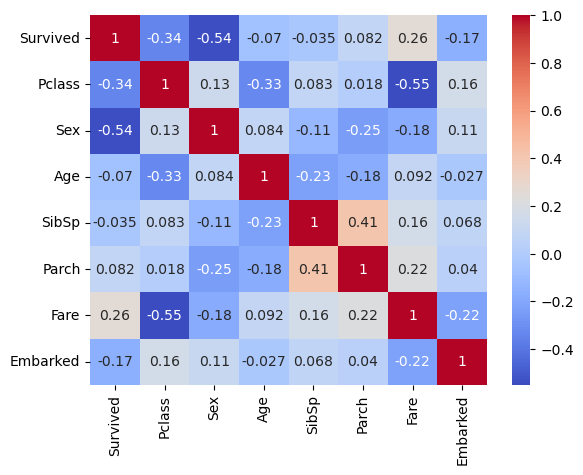

In [29]:
sns.heatmap(d,annot=True,cmap='coolwarm')

In [30]:
#ip/op creation
ip=data2.drop(['Survived'],axis=1)

In [31]:
ip

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [32]:
op=data2['Survived']

In [33]:
data2.shape

(891, 8)

In [34]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.2)

In [35]:
x_train.shape

(712, 7)

In [36]:
# standard scalar transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [37]:
x_train

array([[ 0.8252333 ,  0.75613751,  0.26889931, ..., -0.47662756,
        -0.46658902,  0.58450408],
       [-0.37633339,  0.75613751, -0.04486425, ..., -0.47662756,
        -0.22960067,  0.58450408],
       [ 0.8252333 , -1.32251077,  0.50422198, ..., -0.47662756,
        -0.29870579,  0.58450408],
       ...,
       [-0.37633339,  0.75613751,  1.60239445, ..., -0.47662756,
        -0.38316761,  0.58450408],
       [ 0.8252333 ,  0.75613751, -0.82927315, ..., -0.47662756,
        -0.47818716,  0.58450408],
       [ 0.8252333 ,  0.75613751, -0.59395048, ..., -0.47662756,
        -0.47818716,  0.58450408]])

In [38]:
#logistic regression
from sklearn.linear_model import LogisticRegression
alg1=LogisticRegression()
alg1.fit(x_train,y_train)

LogisticRegression()

In [39]:
yp=alg1.predict(x_test)

In [40]:
yp

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0], dtype=int64)

In [41]:
#Confusion Matrix

#accuracy=(TP+TN)/(TP+FP+FN+TN)

#precision=TP/(TP+FP)

#recall=TP/(TP+FN)

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
cm=confusion_matrix(y_test,yp)
cm

array([[97, 18],
       [19, 45]], dtype=int64)

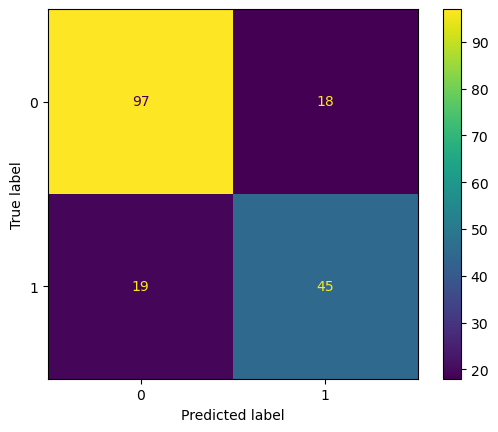

In [44]:
cm1=ConfusionMatrixDisplay(cm)
cm1.plot()
plt.show()

In [45]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc=accuracy_score(y_test,yp)
recall=recall_score(y_test,yp)
precision=precision_score(y_test,yp)
f1=f1_score(y_test,yp)

In [46]:
print(acc)
print(recall)
print(precision)
print(f1)


0.7932960893854749
0.703125
0.7142857142857143
0.7086614173228346


In [47]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [48]:
yp1=nb.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc=accuracy_score(y_test,yp1)
recall=recall_score(y_test,yp1)
precision=precision_score(y_test,yp1)
f1=f1_score(y_test,yp1)

In [50]:
print(acc)
print(recall)
print(precision)
print(f1)


0.770949720670391
0.6875
0.676923076923077
0.6821705426356589


In [51]:
#knn algo
from sklearn.neighbors import KNeighborsClassifier
alg2=KNeighborsClassifier(n_neighbors=5)
alg2.fit(x_train,y_train)

KNeighborsClassifier()

In [52]:
yp2=alg2.predict(x_test)


In [53]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc2=accuracy_score(y_test,yp2)
recall2=recall_score(y_test,yp2)
precision2=precision_score(y_test,yp2)
f2=f1_score(y_test,yp2)

In [54]:
print(acc2)
print(recall2)
print(precision2)
print(f2)


0.8156424581005587
0.640625
0.803921568627451
0.7130434782608696


In [55]:
from sklearn import svm
sv=svm.SVC(kernel='rbf',C=100,gamma=0.01)

sv.fit(x_train,y_train)

SVC(C=100, gamma=0.01)

In [56]:
yp3=sv.predict(x_test)


In [57]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc3=accuracy_score(y_test,yp)
recall3=recall_score(y_test,yp3)
precision3=precision_score(y_test,yp3)
f3=f1_score(y_test,yp3)

In [58]:
print(acc3)
print(recall3)

0.7932960893854749
0.625
